# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
y = y.reshape(len(y), 1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [7]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [8]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y.ravel())

SVR()

## Predicting a new result

In [10]:
regressor.predict(sc_X.transform([[6.5]]))

array([-0.27861589])

In [11]:
sc_y.inverse_transform([regressor.predict(sc_X.transform([[6.5]]))])

array([[170370.0204065]])

## Visualising the SVR results

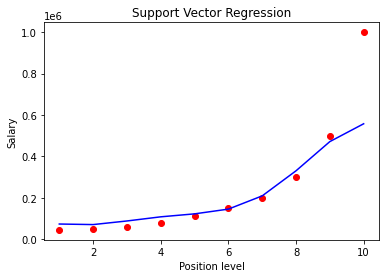

In [12]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform([regressor.predict(X)]).ravel(), color='b')
plt.title("Support Vector Regression")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

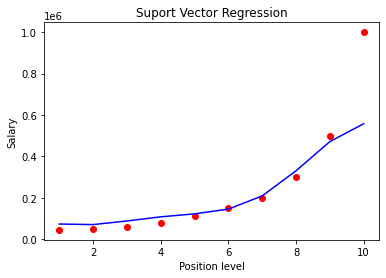

In [13]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform([regressor.predict(X)]).reshape(10,1), color='b')
plt.title("Suport Vector Regression")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

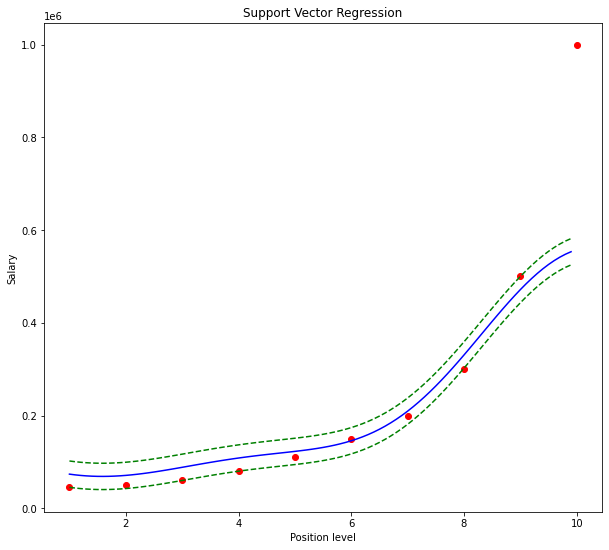

In [14]:
X_grid = np.arange(1,10,0.1).reshape(-1,1)
plt.figure(figsize=(10,9))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid, sc_y.inverse_transform([regressor.predict(sc_X.transform(X_grid))]).ravel(), color='b')


plt.plot(X_grid, sc_y.inverse_transform([regressor.epsilon + regressor.predict(sc_X.transform(X_grid))]).ravel(), color='g', linestyle='dashed')
plt.plot(X_grid, sc_y.inverse_transform([-regressor.epsilon + regressor.predict(sc_X.transform(X_grid))]).ravel(), color='g', linestyle='dashed')



plt.title("Support Vector Regression")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()